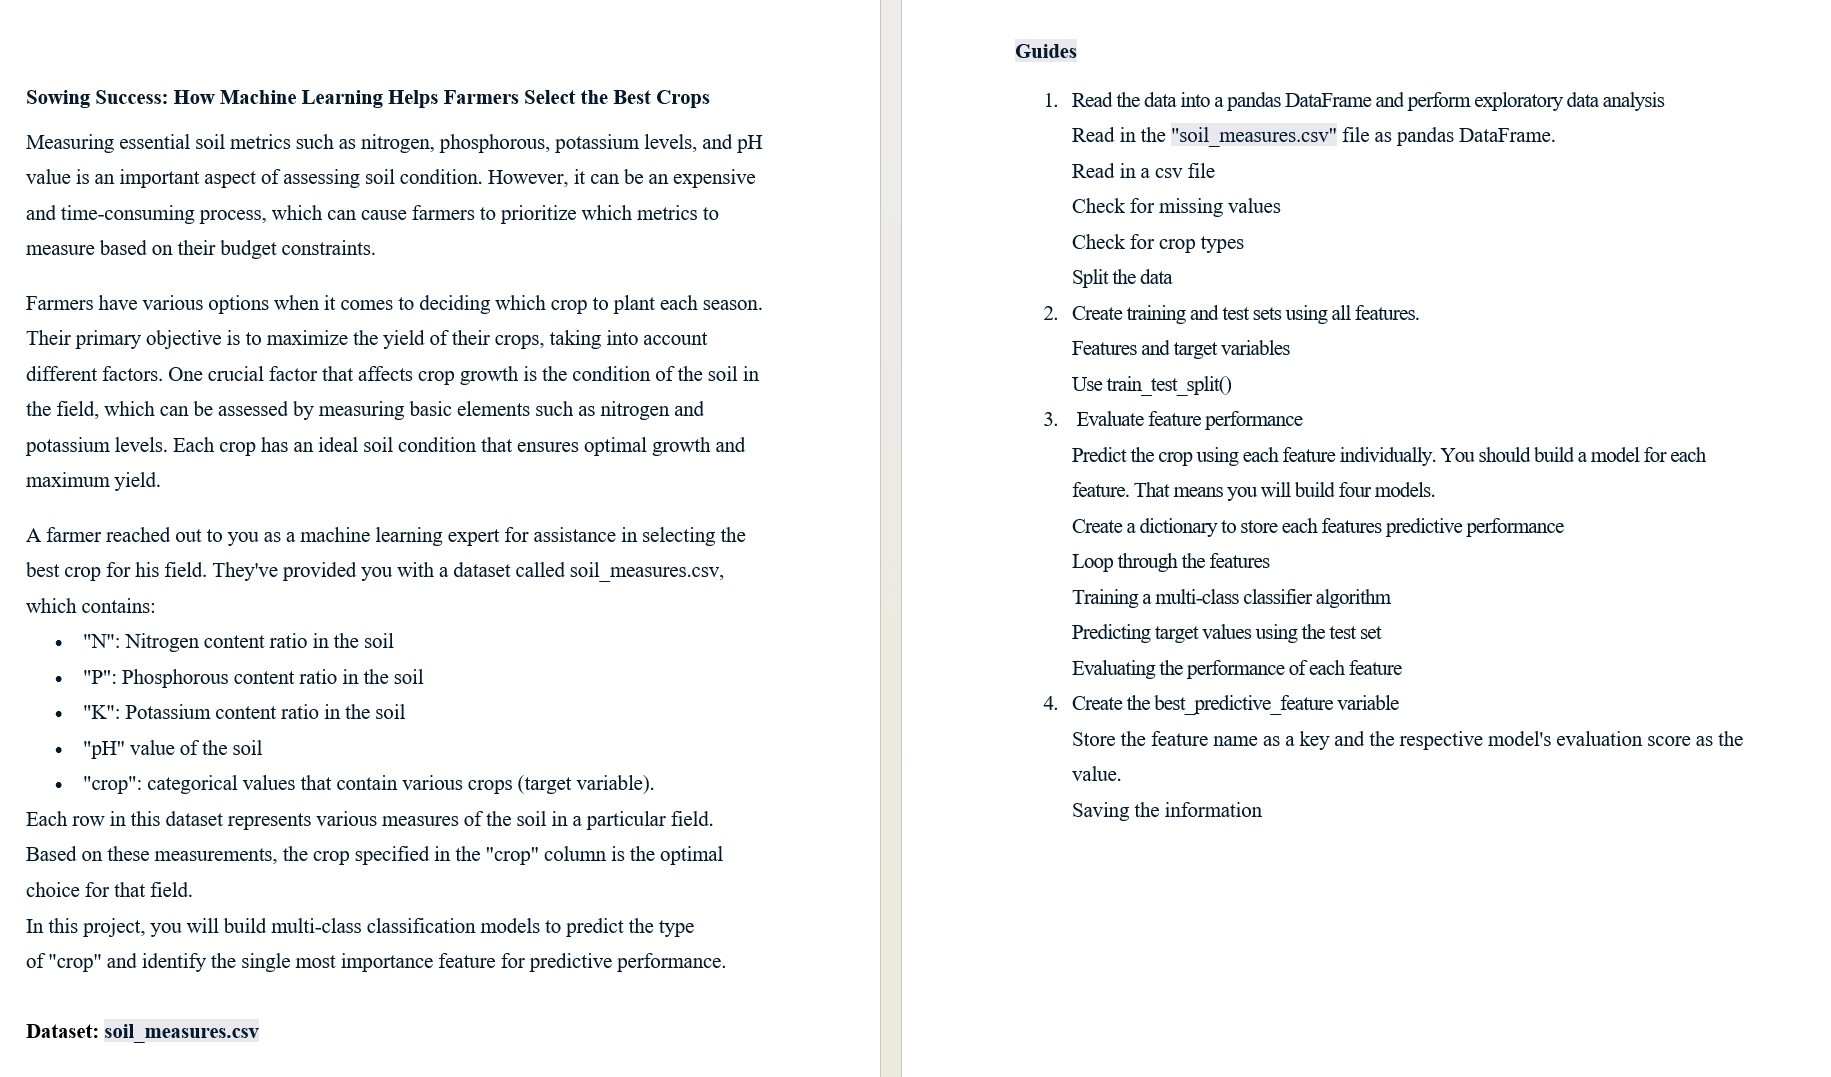

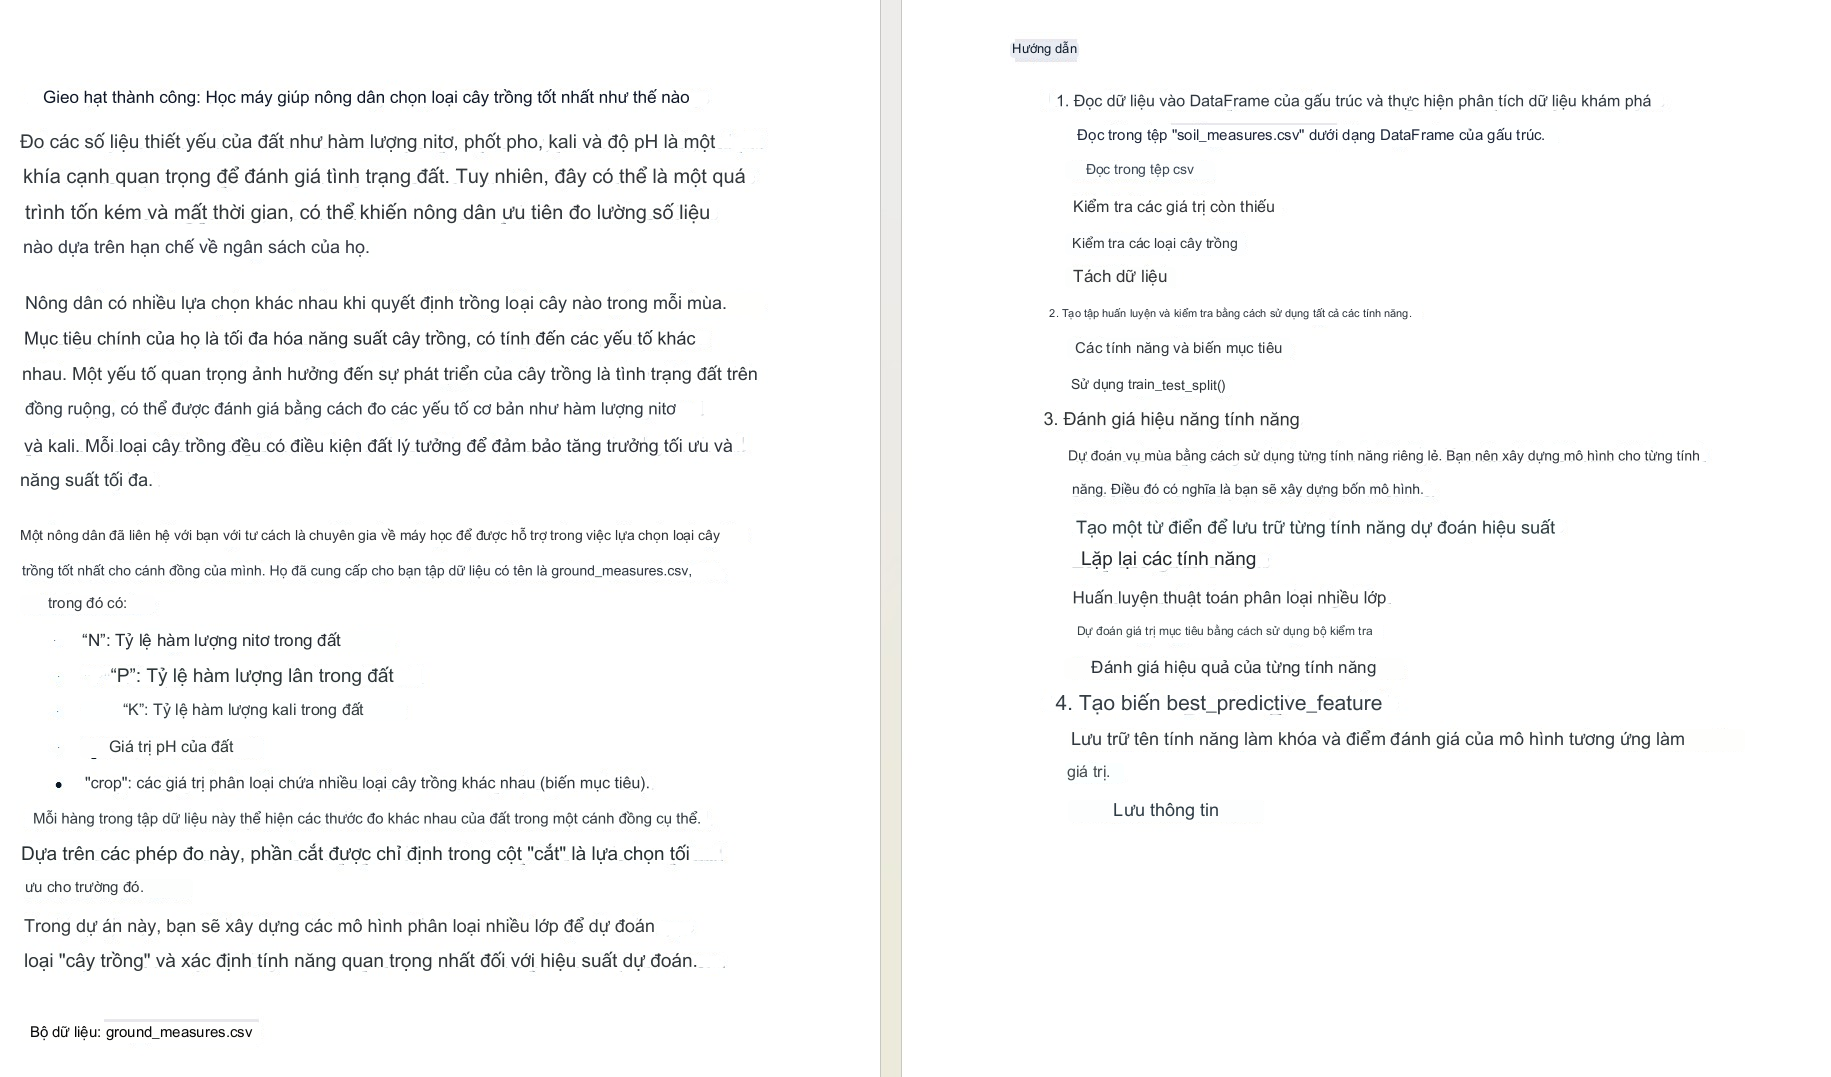

https://www.kaggle.com/code/alisadeghiaghili/predictive-modeling-for-agriculture

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t
from scipy.stats import rankdata
import os
from IPython.display import clear_output

import pingouin

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('soil_measures.csv')
df.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [8]:
# kiem tra du lieu thieu
df.isnull().sum()


N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [9]:
# xoa du lieu thieu
df = df.dropna()
# thay the
df = df.fillna(0)

In [10]:
df.shape

(2200, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [12]:
df.value_counts()

N    P    K    ph        crop       
0    5    36   6.152907  pomegranate    1
69   60   54   6.989927  papaya         1
     37   42   7.073454  rice           1
     46   41   5.012140  rice           1
     47   40   6.130136  jute           1
                                       ..
26   126  195  5.878569  apple          1
     122  202  5.617227  apple          1
     121  201  6.162034  apple          1
     80   83   7.528600  chickpea       1
140  45   15   5.801048  cotton         1
Name: count, Length: 2200, dtype: int64

In [17]:
df.head()   

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [15]:
# cắt dữ liệu cột crop
x = df.drop(columns=['crop'])
y = df['crop']

print(x.shape, y.shape)


(2200, 4) (2200,)


# 2

In [15]:
# Splitting the data
features = ["N", "P", "K", "ph"]
X_train, X_test, y_train, y_test = train_test_split(df[features], df.crop, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1760, 4) (440, 4) (1760,) (440,)


# 3

In [16]:
# from sklearn.model_selection import train_test_split
# # Instantiate a linear regression model
# reg_all = LinearRegression()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# reg_all.fit(X_train, y_train)

# # Create y_pred, making predicrions for sales usin the test features
# y_pred = reg_all.predict(X_test)
# print("Predictions Test : ", y_pred)

# Loop through the features
for feature in ['N', 'P', 'K', 'ph']:
    model = LogisticRegression(
        max_iter=2000,
        multi_class="multinomial"
    )
    model.fit(X_train[[feature]], y_train)
    y_pred = model.predict(X_test[[feature]])
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {feature}: {f1}")

F1-score for N: 0.10489086409777873
F1-score for P: 0.13770290642069416
F1-score for K: 0.23681328118891926
F1-score for ph: 0.04532731061152114
